In [15]:
import pandas as pd
df=pd.read_csv("apple_stock.csv")
df.columns
df.rename(columns={df.columns[0]:"Date"},inplace=True)
df.Date=pd.to_datetime(df.Date)
usd_inr=86.83
df["Adj Close"]=df["Adj Close"]*usd_inr
df["Close"]=df["Close"]*usd_inr
df["High"]=df["High"]*usd_inr
df["Low"]=df["Low"]*usd_inr
df["Open"]=df["Open"]*usd_inr
print(df.isnull().sum())
df.head(5)

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,8.581797,11.144456,11.192908,11.144456,11.144456,469033600
1,1980-12-15,8.134079,10.563043,10.611495,10.563043,10.611495,175884800
2,1980-12-16,7.537053,9.787738,9.836189,9.787738,9.836189,105728000
3,1980-12-17,7.723604,10.029994,10.078445,10.029994,10.029994,86441600
4,1980-12-18,7.947529,10.320788,10.369239,10.320788,10.320788,73449600


In [16]:
df=df.sort_values(by="Date",ascending=False).reset_index(drop=True)
df["volatile"]=df.High-df.Low
df.sort_values(by="volatile",ascending=False).reset_index(drop=True)



,Date,Adj Close,Close,High,Low,Open,Volume,volatile
0,2024-08-05,18129.959849,18170.914471,18538.205000,17018.680000,17286.984382,119548600,1519.525000
1,2024-06-11,17946.294048,17986.833970,17987.703118,16812.893324,16814.628970,172373300,1174.809794
2,2024-06-12,18459.170833,18500.868736,19119.965735,17965.126470,18005.936676,198134300,1154.839265
3,2020-09-04,10252.679871,10502.956721,10740.870735,9628.578647,10425.678074,332607200,1112.292088
4,2020-09-02,11137.583777,11409.461470,11980.803029,11027.410000,11946.939382,200119000,953.393029
...,...,...,...,...,...,...,...,...
11102,1985-10-08,4.514757,5.862935,5.862935,5.862935,5.862935,86979200,0.000000
11103,1985-03-05,7.723604,10.029994,10.029994,10.029994,10.029994,130771200,0.000000
11104,1985-07-10,5.372951,6.977398,6.977398,6.977398,6.977398,106041600,0.000000
11105,1985-02-06,8.954961,11.629055,11.629055,11.629055,11.629055,194432000,0.000000


Text(0.5, 1.0, 'Low(green)-High(blue)-Opening(orange)')

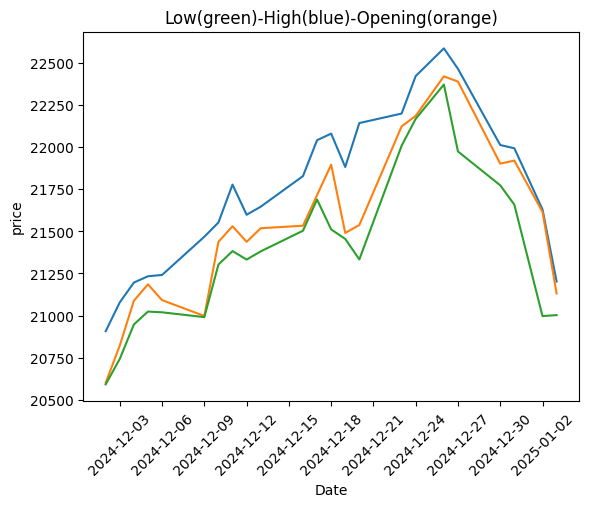

In [24]:
df_1=df[df.Date > pd.to_datetime("2024-12-01")]
df_1=df_1.groupby("Date")[["High","Open","Low"]].mean().reset_index().sort_values(by="Date",ascending=False)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.plot(df_1.Date,df_1.High,label="High Price")
plt.plot(df_1.Date,df_1.Open,label="Open Price")
plt.plot(df_1.Date,df_1.Low,label="Low Price")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("price")
plt.title("Low(green)-High(blue)-Opening(orange)")

2000-09-29 00:00:00
1981-08-10 00:00:00


Text(0, 0.5, 'Volume')

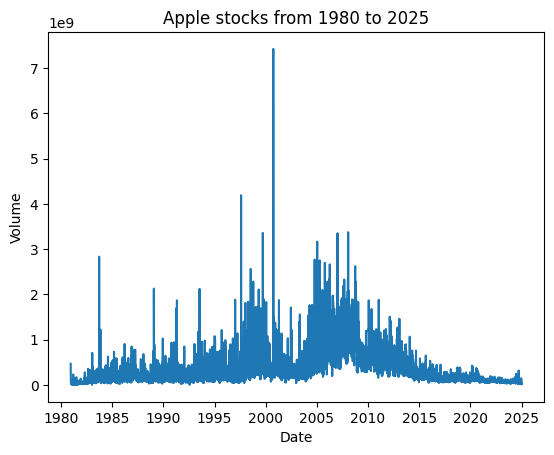

In [18]:
print(df.Date.loc[df.Volume.idxmax()])
print(df.Date.loc[df.Volume.idxmin()])
import matplotlib.pyplot as plt
plt.plot(df.Date,df.Volume)
plt.title('Apple stocks from 1980 to 2025')
plt.xlabel("Date")
plt.ylabel("Volume")

2024-12-26 00:00:00
1982-07-08 00:00:00


Text(0, 0.5, 'price')

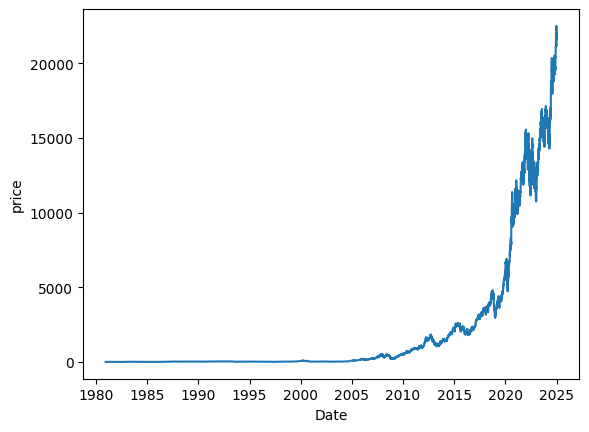

In [19]:
print(df.Date.loc[df["Adj Close"].idxmax()])
print(df.Date.loc[df["Adj Close"].idxmin()])
import matplotlib.pyplot as plt
plt.plot(df.Date,df["Adj Close"])
plt.xlabel("Date")
plt.ylabel("price")

In [22]:
print(df["Adj Close"].describe())

count    11107.000000
mean      2042.435131
std       4321.345099
min          3.283467
25%         21.134604
50%         38.785370
75%       1585.523273
max      22490.705646
Name: Adj Close, dtype: float64


In [ ]:
print(df.head(10))

        Date     Adj Close         Close          High           Low  \
0 2025-01-03  21174.363853  21174.363853  21202.148764  21003.308647   
1 2025-01-02  21173.496030  21173.496030  21629.353530  20997.231236   
2 2024-12-31  21743.968441  21743.968441  21992.302294  21658.006264   
3 2024-12-30  21898.525735  21898.525735  22011.405000  21772.622500   
4 2024-12-27  22192.879382  22192.879382  22462.922060  21973.199588   
5 2024-12-26  22490.705646  22490.705646  22584.483530  22370.013324   
6 2024-12-24  22419.507060  22419.507060  22420.373558  22166.830117   
7 2024-12-23  22165.094471  22165.094471  22198.088970  22007.063235   
8 2024-12-20  22097.367177  22097.367177  22141.650000  21333.262912   
9 2024-12-19  21689.265117  21689.265117  21881.160000  21454.824382   

           Open     Volume    volatile  
0  21131.816676   15135053  198.840117  
1  21614.591264   55558000  632.122294  
2  21919.365412   39480700  334.296030  
3  21901.130529   35557500  238.782500  
4 

Text(0, 0.5, 'Date')

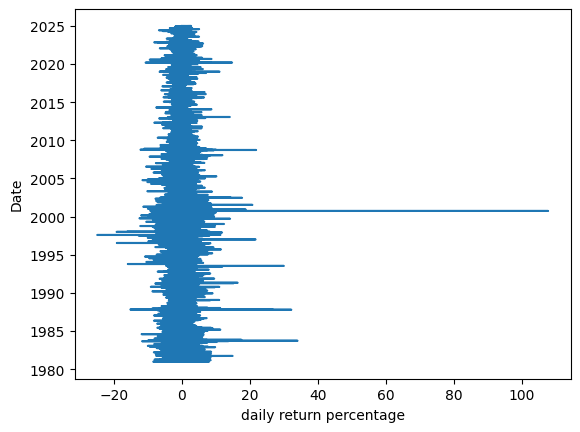

In [43]:
df["daily-returns"]=((df.Close-df.Close.shift(1))/df.Close.shift(1))*100
import matplotlib.pyplot as plt
plt.plot(df["daily-returns"],df.Date)
plt.xlabel("daily return percentage")
plt.ylabel("Date")
